In [2]:
# Importing the Libraries
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn import datasets, svm

# Data Preprocessing 

dataset = pd.read_csv("../Datasets/Iris.csv")

In [3]:
X = dataset.drop(["Id","Species","SepalWidthCm"],axis=1 )
y = dataset["SepalWidthCm"]

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 25)
X_validation, X_test,y_validation, y_test = train_test_split(X_test,y_test, test_size = 0.5, random_state = 25)
len(X_train)

120

In [5]:

# Building the Model ------------------------------------------------------------------------

# Fitting regressior to the Training set
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler

mse_array = []
lambdas = np.logspace(-10,0.0000001,200)
for i in lambdas:
    clf = Ridge(alpha = i)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_validation)
    
    mse = 0
    for j in range(len(pred)):
        mse+=(abs(pred[j]-y_validation[j]))**2
    mse_array.append([mse,i])

In [6]:
alpha = min(mse_array)[1]

In [7]:
alpha

1e-10

In [8]:
class ridge:

    def __init__(self, alpha):
        self.alpha = alpha
        
    def fit(self, X, y):
        leftmat = np.linalg.inv(X.T @ X + (self.alpha*np.eye(np.shape(X.T @ X)[0])))
        self.betas = leftmat @ X.T @ y
    
    def predict(self, X):
        return X @ self.betas

In [9]:

clf =ridge(alpha=alpha)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [10]:
pred

array([2.6032262 , 3.76272582, 2.72499629, 2.5398257 , 3.17708481,
       3.07205637, 3.50965686, 3.1006551 , 3.55217322, 2.82630929,
       3.18129598, 2.69636323, 2.75498217, 3.01283269, 3.32802102])

In [11]:
y_test

array([2.7, 3.4, 3.2, 2.3, 3.1, 2.8, 3.7, 3.4, 3.4, 3. , 3.8, 2.8, 2.8,
       3.2, 3.1])

In [12]:
total = 0
for i in range(len(pred)):
    total+= ((pred[i]-y_test[i]))**2

In [13]:
print(f"the mse is {total/(len(pred))}")

the mse is 0.0777191260270765


In [14]:
beta = (np.linalg.inv((X_train.T @ X_train) + (alpha*np.eye(np.shape(X_train.T @ X_train)[0]))))@ X_train.T @ y_train

In [15]:
X_test@beta

array([2.6032262 , 3.76272582, 2.72499629, 2.5398257 , 3.17708481,
       3.07205637, 3.50965686, 3.1006551 , 3.55217322, 2.82630929,
       3.18129598, 2.69636323, 2.75498217, 3.01283269, 3.32802102])

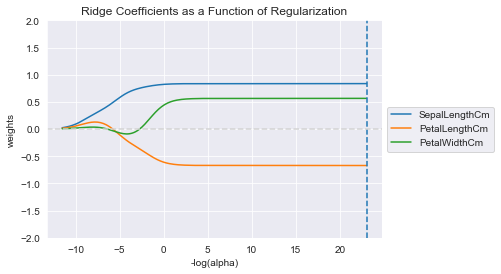

In [49]:
n_alphas = 200
alphas = np.logspace(-10, 5, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(-np.log(alphas), coefs) # reverse axis
ax.legend(['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('-log(alpha)')
plt.ylabel('weights')
plt.axvline(x=-np.log(alpha), linestyle = '--')
plt.axhline(y=0, linestyle = "--", color = "lightgray")
plt.title('Ridge Coefficients as a Function of Regularization')
plt.ylim((-2,2))
plt.show()


In [25]:
 np.logspace(-10, -2, n_alphas)

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [40]:
-np.log(alpha)

23.025850929940457

In [43]:
alpha

1e-10

-0.0